Additional code to reduce overfittling and compare the Randomforest model with baseline Logistics Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(f"https://drive.google.com/uc?id=15akNjGB2rSjQwz7sXsWevZk0xDqarNja", encoding="utf-8")
data = data.dropna()
print('\nBalance of positive and negative error classes (%): \n',
      data['stock_error'].value_counts(normalize=True) * 100)

from sklearn.model_selection import train_test_split

X = data.drop(['stock_error'], axis=1)
target = data['stock_error']

cat = X.select_dtypes(include='O').keys()
X_new = pd.get_dummies(X, columns=cat, drop_first=True)


Balance of positive and negative error classes (%): 
 stock_error
1    53.516227
0    46.483773
Name: proportion, dtype: float64


To remove overfittling, new code added to Limit Tree Depth to maximum depth of 10. Limit Features Per Split (max_features): Only considers the square root of features at each split. Reduce Number of Trees (n_estimators): Uses 100 trees for the forest.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=44,
                                                    stratify=target)

print(X_train.shape)
print(X_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Random Forest Classifier with Constraints
clf = RandomForestClassifier(random_state=22,
                             max_depth=10,          # Limit tree depth
                             max_features='sqrt',   # Use a subset of features
                             n_estimators=100)      # Limit number of trees

(257555, 127)
(110382, 127)


The Random Forest has an ROC-AUC on the training set of 0.8231041584479984
The Random Forest has an ROC-AUC on the testing set of 0.8102949362997693
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     51310
           1       0.73      0.80      0.76     59072

    accuracy                           0.73    110382
   macro avg       0.74      0.73      0.73    110382
weighted avg       0.74      0.73      0.73    110382



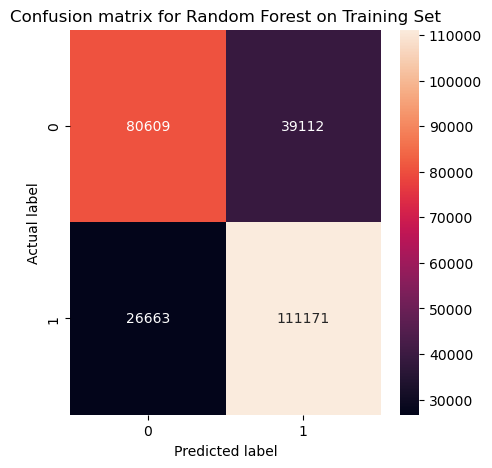

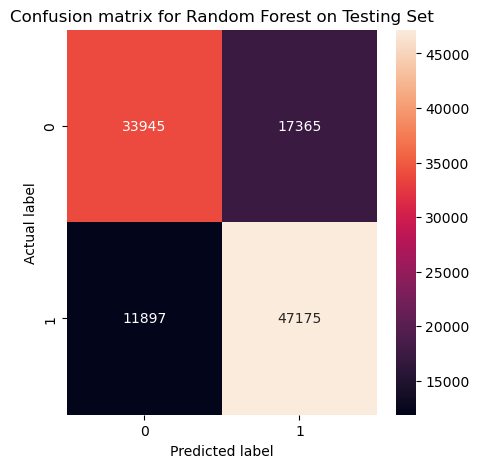

In [3]:
clf.fit(X_train, y_train)

t = 0.5

# Training Performance
prob_est_train = clf.predict_proba(X_train)
roc_train = roc_auc_score(y_train, prob_est_train[:, 1].T)
print('The {} has an ROC-AUC on the training set of {}'.format('Random Forest', roc_train))

y_pred_train_rf = np.where(prob_est_train[:, 1] > t, 1, 0)
cm_rf_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_rf)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf_train, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format('Random Forest on Training Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Testing Performance
prob_est_test_rf = clf.predict_proba(X_test)
roc_test_rf = roc_auc_score(y_test, prob_est_test_rf[:, 1].T)
print('The {} has an ROC-AUC on the testing set of {}'.format('Random Forest', roc_test_rf))

y_pred_test_rf = np.where(prob_est_test_rf[:, 1] > t, 1, 0)
cm_rf_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test_rf)

plt.figure(figsize=(5, 5))
sns.heatmap(cm_rf_test, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format('Random Forest on Testing Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification Report
print(classification_report(y_test, y_pred_test_rf))

ROC-AUC on the training set of 0.8231041584479984 is now very similar to ROC-AUC on the testing set of 0.8102949362997693

Added Logistics Regression to add a baseline simple model for comparison

Logistic Regression has an ROC-AUC on the training set of 0.7938366219431071
Logistic Regression has an ROC-AUC on the testing set of 0.7932322427850764

### Model Performance Comparison ###
Random Forest:
Training ROC-AUC: 0.823
Testing ROC-AUC: 0.810

Logistic Regression:
Training ROC-AUC: 0.794
Testing ROC-AUC: 0.793


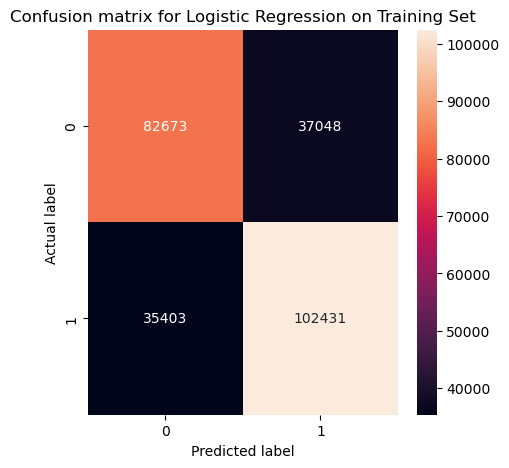

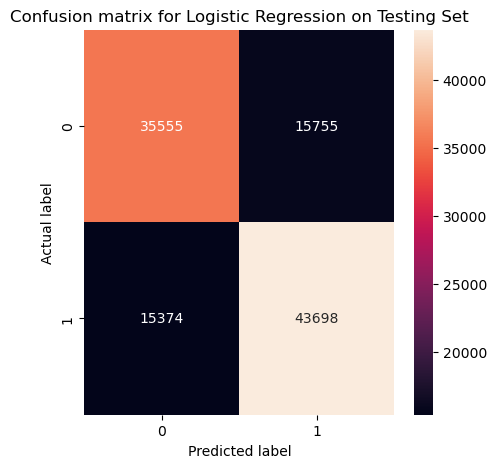

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report


log_reg = LogisticRegression(random_state=22, max_iter=1000)  # Increased iterations for convergence
log_reg.fit(X_train, y_train)

prob_est_train_lr = log_reg.predict_proba(X_train)
roc_train_lr = roc_auc_score(y_train, prob_est_train_lr[:, 1])
print('Logistic Regression has an ROC-AUC on the training set of {}'.format(roc_train_lr))

y_pred_train_lr = np.where(prob_est_train_lr[:, 1] > t, 1, 0)
cm_lr_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_lr)

# Logistic Regression: Training Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm_lr_train, annot=True, fmt="d")
plt.title('Confusion matrix for Logistic Regression on Training Set')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Evaluate Logistic Regression on Testing Set
prob_est_test_lr = log_reg.predict_proba(X_test)
roc_test_lr = roc_auc_score(y_test, prob_est_test_lr[:, 1])
print('Logistic Regression has an ROC-AUC on the testing set of {}'.format(roc_test_lr))

y_pred_test_lr = np.where(prob_est_test_lr[:, 1] > t, 1, 0)
cm_lr_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test_lr)

# Logistic Regression: Testing Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm_lr_test, annot=True, fmt="d")
plt.title('Confusion matrix for Logistic Regression on Testing Set')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Comparison Between Random Forest and Logistic Regression
print("\n### Model Performance Comparison ###")
print("Random Forest:")
print("Training ROC-AUC: {:.3f}".format(roc_train))
print("Testing ROC-AUC: {:.3f}".format(roc_test_rf))
print("\nLogistic Regression:")
print("Training ROC-AUC: {:.3f}".format(roc_train_lr))
print("Testing ROC-AUC: {:.3f}".format(roc_test_lr))


Logistics regression doesn't perform singficantly inferior to RandonForest in this instance of data